# Analysis of the LDHA/B vs Control glioblastoma P3 samples

This analysis was published in Guyon _et al_. 2022, and is also shown in our manuscript.
This notebook will guide you to reproduce the analysis, through 3 steps:
1. Verifying the input files
2. Running the commands for each step of the analysis:
  * Exploratory Analysis
  * Differential Analysis, to find Differentially Abundant-or-Marked Metabolites (DAMs) comparing two conditions
  * Metabologram
3. Visualizing the results

We present here the analysis as a jupyter notebook, but other alternatives exist: command line in a unix terminal, Snakemake, or Galaxy.

In [1]:
import os
import pandas as pd
import yaml
%matplotlib inline

## Input files

This section will  display the input data, no modifications are done on it.
The metadata and the .yml files have been elaborated coherently with the samples and options for the analysis, respectively.  

In [2]:
metadata_filename = "gb-ldh-TD/data_pub/metadata_endo_ldh.csv"
metadata = pd.read_csv(metadata_filename, sep='\t')
metadata.head()

,original_name,name_to_plot,condition,timepoint,timenum,short_comp
0,T0_AB_1,sgLDHAB_T0-1,sgLDHAB,T0,0,en
1,T0_AB_2,sgLDHAB_T0-2,sgLDHAB,T0,0,en
2,T0_AB_3,sgLDHAB_T0-3,sgLDHAB,T0,0,en
3,T0_Cont_1,Cont_T0-1,Cont,T0,0,en
4,T0_Cont_2,Cont_T0-2,Cont,T0,0,en


In [34]:
# this config file will serve to all modules, except metabologram
config_filename = "gb-ldh-TD/analysis_pub/configpub.yml"
with open(config_filename, "r") as f:
    confidic = yaml.load(f, Loader=yaml.Loader)

In [23]:
for key in confidic.keys():
    print(key,":", confidic[key])

metadata_path : DIMet/examples/gb-ldh-TD/data_pub/metadata_endo_ldh.csv
name_abundance : AbundanceCorrected
name_meanE_or_fracContrib : MeanEnrichment13C
name_isotopologue_prop : IsotopologuesProp
name_isotopologue_abs : IsotopologuesAbs
conditions : ['Cont', 'sgLDHAB']
suffix : L
out_path : DIMet/examples/gb-ldh-TD/analysis_pub/
metabolites_to_plot : {'en': ['PEP', 'Pyr', 'Cit', 'IsoCit', 'a-KG', 'Suc', 'Fum', 'Mal', 'Glutamine', 'Glutamate', 'Aspartate', 'Alanine', '2-OHGLu', 'Glc6P', 'Fru1P']}
time_sel : ['T48']
barcolor : condition
axisx : timepoint
axisx_labeltilt : 0
width_each_subfig : 2.2
wspace_subfigs : 0.8
width_each_stack : 1.8
wspace_stacks : 0.8
numbers_size : 9
grouping : ['condition', 'timepoint']
comparisons : [['sgLDHAB_T48', 'Cont_T48']]
statistical_test : {'abundances': 'ranksum', 'meanE_or_fracContrib': 'ranksum', 'isotopologue_abs': 'ranksum', 'isotopologue_prop': None}
thresholds : {'padj': 0.05, 'absolute_log2FC': 0}


In [35]:
# quantifications files
abundance = pd.read_csv(f'gb-ldh-TD/data_pub/{confidic["name_abundance"]}.csv',
                       sep='\t', header=0, index_col=0)
abundance.head(3)

,T0_AB_1,T0_AB_2,T0_AB_3,T0_Cont_1,T0_Cont_2,T0_Cont_3,T24_AB_1,T24_AB_2,T24_AB_3,T24_Cont_1,T24_Cont_2,T24_Cont_3,T48_AB_1,T48_AB_2,T48_AB_3,T48_Cont_1,T48_Cont_2,T48_Cont_3
metabolite_or_isotopologue,,,,,,,,,,,,,,,,,,
2_3-PG,8.311915e+06,7.771853e+06,8.898423e+06,1.228696e+07,1.201974e+07,1.409083e+07,6.369880e+06,7.127045e+06,7.660166e+06,9.205927e+06,6.236145e+06,8.265085e+06,2.555845e+06,3.128003e+06,3.445441e+06,1.704284e+06,1.566943e+06,1.731890e+06
2-OHGLu,7.063592e+06,7.407918e+06,7.505947e+06,5.938417e+06,7.582384e+06,7.903334e+06,4.752538e+06,4.966305e+06,5.483598e+06,1.011161e+07,1.018830e+07,9.475427e+06,3.373346e+06,3.426389e+06,3.988440e+06,2.636248e+07,1.966474e+07,2.266053e+07
6-PG,3.458179e+06,3.194461e+06,3.641506e+06,6.063149e+06,8.458124e+06,9.902065e+06,4.009882e+06,4.068603e+06,4.305689e+06,1.320610e+07,9.341520e+06,1.162682e+07,1.272239e+06,1.390995e+06,1.477361e+06,4.835295e+06,2.975614e+06,4.462009e+06


In [36]:
isotopologues_abs = pd.read_csv(f'gb-ldh-TD/data_pub/{confidic["name_isotopologue_abs"]}.csv',
                       sep='\t', header=0, index_col=0)
isotopologues_abs.head(3)

,T0_AB_1,T0_AB_2,T0_AB_3,T0_Cont_1,T0_Cont_2,T0_Cont_3,T24_AB_1,T24_AB_2,T24_AB_3,T24_Cont_1,T24_Cont_2,T24_Cont_3,T48_AB_1,T48_AB_2,T48_AB_3,T48_Cont_1,T48_Cont_2,T48_Cont_3
metabolite_or_isotopologue,,,,,,,,,,,,,,,,,,
2_3-PG_m+0,2.185432e+06,1.958221e+06,2.283735e+06,298441.8262,268050.3636,360853.6529,707218.20780,1.402972e+06,1.358128e+06,26381.30429,23698.76230,29674.89889,703151.91670,856725.4533,961394.03850,42043.98974,56438.37354,37427.49772
2_3-PG_m+1,0.000000e+00,0.000000e+00,0.000000e+00,0.0000,0.0000,0.0000,20285.21129,1.361887e+04,1.288390e+04,0.00000,0.00000,0.00000,9099.30813,0.0000,0.00000,0.00000,0.00000,0.00000
2_3-PG_m+2,8.856398e+04,8.566362e+04,9.703953e+04,200778.0533,197229.6694,247336.7766,138851.49780,1.370391e+05,1.652718e+05,146120.99230,89966.23931,125127.03290,35196.39397,34163.9901,37498.28763,20998.75488,22388.47005,21257.21399


In [38]:
isotopologues_prop = pd.read_csv(f'gb-ldh-TD/data_pub/{confidic["name_isotopologue_prop"]}.csv',
                       sep='\t', header=0, index_col=0)
isotopologues_prop.head(3)

,T0_AB_1,T0_AB_2,T0_AB_3,T0_Cont_1,T0_Cont_2,T0_Cont_3,T24_AB_1,T24_AB_2,T24_AB_3,T24_Cont_1,T24_Cont_2,T24_Cont_3,T48_AB_1,T48_AB_2,T48_AB_3,T48_Cont_1,T48_Cont_2,T48_Cont_3
metabolite_or_isotopologue,,,,,,,,,,,,,,,,,,
2_3-PG_m+0,0.262928,0.251963,0.256645,0.024289,0.022301,0.025609,0.111025,0.196852,0.177297,0.002866,0.003800,0.003590,0.275115,0.273889,0.279034,0.024670,0.036018,0.021611
2_3-PG_m+1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003185,0.001911,0.001682,0.000000,0.000000,0.000000,0.003560,0.000000,0.000000,0.000000,0.000000,0.000000
2_3-PG_m+2,0.010655,0.011022,0.010905,0.016341,0.016409,0.017553,0.021798,0.019228,0.021575,0.015872,0.014427,0.015139,0.013771,0.010922,0.010883,0.012321,0.014288,0.012274


In [40]:
frac_contrib = pd.read_csv(f'gb-ldh-TD/data_pub/{confidic["name_meanE_or_fracContrib"]}.csv',
                       sep='\t', header=0, index_col=0)
frac_contrib.head(3)

,T0_AB_1,T0_AB_2,T0_AB_3,T0_Cont_1,T0_Cont_2,T0_Cont_3,T24_AB_1,T24_AB_2,T24_AB_3,T24_Cont_1,T24_Cont_2,T24_Cont_3,T48_AB_1,T48_AB_2,T48_AB_3,T48_Cont_1,T48_Cont_2,T48_Cont_3
metabolite_or_isotopologue,,,,,,,,,,,,,,,,,,
2-OHGLu,0.000925,0.007335,0.005107,0.004866,0.010286,0.015921,0.193400,0.220119,0.255427,0.501616,0.433474,0.501440,0.206825,0.276523,0.262837,0.495181,0.477725,0.481746
2_3-PG,0.733521,0.744363,0.739720,0.970264,0.972230,0.968540,0.879586,0.795465,0.814389,0.991843,0.991391,0.991363,0.717921,0.722470,0.717339,0.971223,0.959219,0.974298
6-PG,0.858058,0.854735,0.850182,0.946492,0.954677,0.952763,0.904211,0.848492,0.888455,0.969868,0.970309,0.967661,0.866999,0.852246,0.860356,0.944488,0.957596,0.957012


**Input for metabologram:**


Before the metabologram, often the biologist will need to conciously define the most relevant elements to show.Such concious definition is made through a specific .yml file for running the metabologram ( `gb-ldh-TD/analysis_pub/config_mgram_pub.yml` ) and the metabologram input data: `gb-ldh-TD/analysis_pub/metabologram_data/`. The sub-folders organization as presented in this analysis is highly recommended. You can customize the pathways related files (files with name starting with 'pathways_").

Note that a fast illustration is presented here, that means that we had previously generated the DAM files and they were copied inside the `gb-ldh-TD/analysis_pub/metabologram_data/DAM_tables` for organization. 



## Running the analysis

We will run the commands for the entire analysis, please note:

In this jupyter notebook, this line:

```
%run -i DIMet/src/prepare.py gb-ldh-TD/analysis_pub/configpub.yml
```

is equivalent to the following one in the terminal (or inside a Snakefile):
```
$ python3 -m DIMet.src.prepare gb-ldh-TD/analysis_pub/configpub.yml
```

In [3]:
# go ouside DIMet for clearer commands

os.chdir("../../")

#### Exploratory analysis

In [4]:
%run -i DIMet/src/prepare.py DIMet/examples/gb-ldh-TD/analysis_pub/configpub.yml

In [5]:
%run -i DIMet/src/pca.py DIMet/examples/gb-ldh-TD/analysis_pub/configpub.yml  

<Figure size 640x480 with 0 Axes>

In [6]:
%run -i DIMet/src/abundances_bars.py DIMet/examples/gb-ldh-TD/analysis_pub/configpub.yml

In [89]:
%run -i DIMet/src/isotopolog_prop_stacked.py DIMet/examples/gb-ldh-TD/analysis_pub/configpub.yml

In [90]:
%run -i DIMet/src/MEorFC_lineplot.py DIMet/examples/gb-ldh-TD/analysis_pub/configpub.yml

 Mean Enrichment -or Fractional contributions- plots 



#### Differential Analysis

In [91]:
%run -i DIMet/src/differential_analysis.py DIMet/examples/gb-ldh-TD/analysis_pub/configpub.yml


  -*- searching for              Differentially Abundant-or-Marked Metabolites (DAM) -*-

processing abundances
processing mean enrichment or fractional contributions
processing absolute isotopologues
end


#### Metabologram

In [33]:
# re-adjust text size for metabologram, as exploratory plots introduced a bigger font size, 
# note that this is not necessary if using the terminal or a Snakefile
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size": 12})

In [10]:
%run -i DIMet/src/metabologram.py DIMet/examples/gb-ldh-TD/analysis_pub/config_mgram_pub.yml


Metabologram

shaped data for metabologram
Plotting metabologram 6 out of 6
Done plotting!


## Visualize the results

In [13]:
os.chdir("DIMet/examples/gb-ldh-TD/analysis_pub/results/")

In [14]:
# the results are found in sub-folders inside results/:
os.listdir()

['differential_analysis', 'prepared_tables', 'plots']

The `prepared_tables/` folder, produced by `prepare.py`, contains files with adequate formatting for isotopologues names and samples names, and splitted by compartment. 

We go directly to exploratory analysis (plots and PCA), differential analysis and metabologram. Go to those folders and open the vector images .pdf files.

#### Exploratory Analysis results

In [9]:
os.listdir("plots/")

['metabologram',
 'pca_Abundance',
 'pca_fracCorME',
 'lineplots_MEorFC',
 'stacked_Isotopologue_prop',
 'bars_Abundance']

In [16]:
os.listdir("plots/pca_Abundance/") # PCA on metabolite total abundances 

['pca_Abundance-en-T24-L_labelyes.pdf',
 'pca_Abundance-en-T48-L_labelyes.pdf',
 'pca_Abundance-en-L_labelno.pdf',
 'variance_pca_Abundance-en-T48-L.pdf',
 'variance_pca_Abundance-en-T0-L.pdf',
 'pca_Abundance-en-L_labelyes.pdf',
 'pca_Abundance-en-T0-L_labelyes.pdf',
 'variance_pca_Abundance-en-L.pdf',
 'variance_pca_Abundance-en-T24-L.pdf']

In [15]:
os.listdir("plots/pca_fracCorME/") # PCA on fractional contributions or mean enrichment

['variance_pca_fracContrib-en-T24-L.pdf',
 'variance_pca_fracContrib-en-T48-L.pdf',
 'variance_pca_fracContrib-en-T0-L.pdf',
 'pca_fracContrib-en-L_labelyes.pdf',
 'variance_pca_fracContrib-en-L.pdf',
 'pca_fracContrib-en-T0-L_labelyes.pdf',
 'pca_fracContrib-en-T24-L_labelyes.pdf',
 'pca_fracContrib-en-T48-L_labelyes.pdf',
 'pca_fracContrib-en-L_labelno.pdf']

For barplots, stacked bars and line plots we supply a legend as a separate .pdf that is valid for all the respective folder content:

In [16]:
os.listdir("plots/stacked_Isotopologue_prop/") # provided with/without x-axis text, to facilitate customization later in image editors

['isotopologues_stack--en.pdf',
 'legend_isotopologues_stackedbars.pdf',
 'isotopologues_stack--en_noxlab.pdf']

The generated plots are **vector image (vector graphics)**, in pdf formats. All these figures .pdf and .svg figures can be assempled in the final layout of your preference in a graphics processor of your choice (power point, inkscape, adobe illustrator, GIMP, etc). 

In [42]:
from IPython.display import IFrame
IFrame(src="plots/stacked_Isotopologue_prop/isotopologues_stack--en.pdf", width=500, height=100)

#### Differential analysis results

The filters by padj <= 0.05 produce filtered tables that correspond to DAM (Differentially Abundant-or-Marked Metabolites)

In [27]:
os.listdir("differential_analysis")

['abundance', 'meanE_fracContr', 'isotopol_abs']

In [28]:
os.listdir("differential_analysis/meanE_fracContr/filtered")

['MeanEnrichment13C--en--L-sgLDHAB_T48_Cont_T48-ranksum_filter.tsv']

In [41]:
# a glance on the mean enrichment differential analysis results, filtered by the thresholds specified in .yml file
result_file = "differential_analysis/meanE_fracContr/filtered/MeanEnrichment13C--en--L-sgLDHAB_T48_Cont_T48-ranksum_filter.tsv"

DAM_fracContrib = pd.read_csv(result_file, sep='\t', header=0)
DAM_fracContrib.head(20)

,metabolite,log2FC,stat,pvalue,padj,distance/span,FC,count_nan_samples,distance,span_allsamples,...,input_sgLDHAB_T48-2,input_sgLDHAB_T48-3,Cont_T48-1,Cont_T48-2,Cont_T48-3,sgLDHAB_T48-1,sgLDHAB_T48-2,sgLDHAB_T48-3,geommean_sgLDHAB_T48,geommean_Cont_T48
0,PRPP,-12.593166,-1.963961,0.024767,0.028895,1.000000,0.000162,"('0/3', '0/3')",2.000000,2.000000,...,0.000162,0.000162,2.000324,2.000324,2.000324,0.000324,0.000324,0.000324,0.000324,2.000324
1,Rib1P,-11.780111,-1.963961,0.024767,0.028895,0.926501,0.000284,"('0/3', '0/3')",1.916906,2.068973,...,0.000162,0.000162,1.917474,2.069541,2.008826,0.000568,0.000568,0.000568,0.000568,1.997631
2,2_3-PG,-0.428870,-1.963961,0.024767,0.028895,0.921347,0.742844,"('0/3', '0/3')",1.900112,2.062319,...,0.722470,0.717339,7.794900,7.698556,7.819575,5.761931,5.798444,5.757256,5.772514,7.770834
3,ADP,0.734977,1.963961,0.024767,0.028895,0.916868,1.664371,"('0/3', '0/3')",1.903806,2.076424,...,0.392402,0.395510,2.992102,2.971168,3.063323,4.967129,5.007918,5.047592,5.007439,3.008607
4,GMP,-1.210110,-1.963961,0.024767,0.028895,0.862872,0.432236,"('0/3', '0/3')",1.858633,2.154008,...,0.111167,0.105097,3.642065,3.432631,3.466669,1.494256,1.573998,1.488057,1.518272,3.512603
5,UMP,-0.741038,-1.963961,0.024767,0.028895,0.841031,0.598309,"('0/3', '0/3')",1.800659,2.141015,...,0.240430,0.232373,5.000657,4.903686,4.999022,3.103027,2.958784,2.859643,2.972146,4.967581
6,CMP,-9.207100,-1.963961,0.024767,0.028895,0.837724,0.001692,"('0/3', '0/3')",1.818697,2.170997,...,0.000162,0.000162,1.822060,2.174360,1.982477,0.003363,0.003363,0.003363,0.003363,1.987776
7,P5P,-0.946089,-1.963961,0.024767,0.028895,0.829573,0.519038,"('0/3', '0/3')",1.774548,2.139110,...,0.454765,0.450114,4.221054,4.052557,4.170722,2.278009,2.103455,2.081944,2.152712,4.147507
8,Glutamine,-1.309902,-1.963961,0.024767,0.028895,0.825849,0.403348,"('0/3', '0/3')",1.782297,2.158139,...,0.175072,0.177512,3.473364,3.169410,3.367852,1.387113,1.315224,1.333554,1.344954,3.334473
9,ATP,0.926716,1.963961,0.024767,0.028895,0.799280,1.900944,"('0/3', '0/3')",1.746458,2.185039,...,0.441109,0.450166,2.152492,2.216326,2.246068,3.992526,4.250264,4.337531,4.190850,2.204615


The p-value and _pajd_ are identical because the non-parametric tests (here Wilcoxon's rank sum) have this behavior when the sample size is very small and the ranks inside each group are very similar.

#### Metabologram results

The generated plots are **vector image (vector graphics)**.

In [43]:
os.listdir("plots/metabologram/")

['legend.pdf',
 'KEGG_ALANINE_ASPARTATE_AND_GLUTAMATE_METABOLISM_comparison1.pdf',
 'KEGG_CITRATE_CYCLE_TCA_CYCLE_comparison1.pdf',
 'KEGG_ALANINE_ASPARTATE_AND_GLUTAMATE_METABOLISM_comparison2.pdf',
 'KEGG_GLYCOLYSIS_GLUCONEOGENESIS_comparison2.pdf',
 'KEGG_CITRATE_CYCLE_TCA_CYCLE_comparison2.pdf',
 'KEGG_GLYCOLYSIS_GLUCONEOGENESIS_comparison1.pdf']

 The metabologram results folder also comes with a legend in the separate file together with the plots files, this legend is valid for all the acompanying files in the folder. Moreover, we add here an extended legend (left) useful for publications, and a recommended layout example (right):

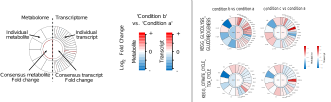

In [39]:
from IPython.core.display import SVG
SVG(filename='../../../../imgs/metabologram_legend.svg')

**-*-** **End of the DIMet analysis** **-*-**


-------------------------------------------

![Alt text](https://mirrors.creativecommons.org/presskit/logos/cc.logo.svg)

<object data="https://github.com/johaGL/vdb_joha_marie/blob/main/plots/ACP.pdf" type="application/pdf" width="700px" height="700px">
    <embed src="https://github.com/johaGL/vdb_joha_marie/blob/main/plots/ACP.pdf">
        <p>This browser does not support PDFs. Please download the PDF to view it: <a href="https://github.com/johaGL/vdb_joha_marie/blob/main/plots/ACP.pdf">Download PDF</a>.</p>
    </embed>
</object>



## Details regarding the Differential Analysis


#### Before start Differential Analysis

It is highly recommended to have 3 or more replicates (n >=3) to keep an acceptable statistical power.

Set your options in your .yml, as shown in [examples/](examples/)

 - For two-group univariate analysis, in your .yml you must specify:
    * grouping: for complex grouping, check the 
    * comparisons: list of the comparisons to be performed.
    * statistical_test : the statistical test to apply, by type of measure.	

 - For time-course analysis:
    * time_course: see below the list of possible statistical methods.
    
 - multi-group analysis:
    * multiclass_analysis : KW

For all the three possibilities, your .yml you must specify:
    * thresholds : _padj_ and absolute_log2FC

For two-group univariate differential analysis, define **grouping** in your configuration .yml file. This is the category we pick for comparison, example with only one category:
 
``` 
grouping :
  - timepoint
```

example with two categories to combine:

``` 
 grouping :
  - timepoint
  - condition
```

When two categories are given, DIMet internally combines these 2 metadata categories,
consequently a new category is generated, and it is ready for comparison. 
This is how DIMet operates:
 
   *  "Control" (a condition) combined with "T0" (timepoint), yields "Control_T0"
   *  "L-Cyclo" (another condition) combined with "T0" (timepoint) yields "L-Cyclo_T0"
   *  thus now, we are able to compare "L-Cyclo_T0" against "Control_T0".

Please see 'toy2/' example, if you have two categories to combine.
In the section "comparisons" (.yml file) just use the "_" symbol among
the condition and time-point words, with no spaces. 
For example:
``` 
 comparisons:
   - [ L-Cyclo_T0, Control_T0 ]
```
says to DIMet to compute L-Cyclo_T0 *versus* Control_T0. 

#### Running Differential Analysis
      
There are advanced options (Optional arguments)  : 

  - Before reduction and gmean, the way to replace zeros is by default using the min value of the entire table.
  There is a separate option for each type of measure, see `python -m DIMet.src.differential_analysis --help` 
      
  - exclude one or more type(s) of measure from the analysis (`--no-isotopologues` will exclude isotopologues).
 
  - `--qualityDistanceOverSpan`: see explanation below 


##### Distance Over Span (d/s)

In general the number of samples can be limited by many extinsic and intrinsic factors (funding, animal welfare, etc). We recommed at least n>=3 in each group to be compared. 

When n is small (n < 10) the result of the statistical test, alone, can still be misleading. We introduce in DIMet the notion of distance/span, which is expained in the figure below: 

![d_over_s](imgs/d_over_s_readme.png)

The best d/s are closer to 1 (fully separated groups and highly reproducible measure). The smaller the d/s, the poorer the "separation" between the two groups being compared. Negative numbers say that the distance is not positive i.e.  the interval of 'A' group and the interval of 'B' group are overlapping.
   Worst result d/s = -1

Specially when dealing with a very small sample size (n<=5), this metric "reflect to a certain extent" the replicability of the measure. 

The option `--qualityDistanceOverSpan` has the following effect:
For a current comparison,  if a metabolite has d/s  inferior to this value, it is excluded from the multiple test correction and its _padj_ is set to NaN; therefore this metabolite will not be in the "filtered" results (filtered by thresholds _padj_ and log2FC). By default `--qualityDistanceOverSpan` is fixed to -0.3 (not stringent).

However, `--qualityDistanceOverSpan` must be used with caution if n >= 6 and outliers are present. To inactivate its automatic behavior, set to -1.


#### Output table Differential Analysis

##### Columns also supplied:

* 'distance' : units separating the two groups.

* 'span_allsamples' : taking both groups mixed, the units between min and max values.

* 'count\_nan\_samples' : for example (1/2, 0/2) means "one of the two replicates in the Treatment group is NaN, whereas 0 (none) in the Control group are NaN", or in other words:  treated=[0.57, NaN] , control=[0.88, 0.90].

	At least 2 replicates must be available in each group for a metabolite to enter into the statistical analysis. For example '(2/4),(1/4)' is still admitted because that means one group has 2 and the other has 3 replicates.

* Columns starting by 'input_' contain the values of the samples as given in the input files

* The columns with the samples names that are identical as in metadata, correspond to the reduced values (divided by the standard deviation). Reduction is required to control for dispersion before conducting the statistical analysis. All calculations are done on these reduced values.

* The columns starting by 'gmean_' are the geometric means over the replicates of each group, separately
        
        
##### Extended Results:

In results/differential_analysis/[type_of_measure]/extended/ you will find all the differential analysis results without any threshold-based filtering.
        
    

---------------------------------------

## The "Metadata"

Here the first lines of the required metadata table, which must be a 'tab' delimited file : 
You can create it with any spreadsheet program such as Excel or Google Sheets or 
LibreOfice Calc. At the moment of saving your file you specify that the delimiter 
must be a tab or tabular (see https://support.microsoft.com/en-us/office/import-or-export-text-txt-or-csv-files-5250ac4c-663c-47ce-937b-339e391393ba).
The extension of the file must be .csv

Column names in metadata must be exactly: 
 - original\_name
 - sample
 - timepoint
 - timenum
 - condition
 - short\_comp

 
The column 'original\_name' must have the names of the samples **as given in your data**. 
  
 
 The column 'name\_to\_plot' must have the names as you want them to be (or set identical to original\_name if you prefer). To set  names that are meaningful is a better choice, as we will take them to display the results.
 
 
 The column 'timenum' must contain only the numeric part of the timepoint, for example 2,0, 10, 100  (this means, without letters ("T", "t", "s", "h" etc) nor any other symbol). Make sure these time numbers are in the same units (but do not write  the units here!).
  

The column 'short\_comp' is an abbreviation, coined by you, for the compartments. This will be used for the results' files names: the longer the compartments names are, the longer the output files' names! Please pick short and clear abbreviations to fill this column.

